In [2]:
import numpy as np
import csv
import math
import matplotlib.pyplot as plt
import sympy
import itertools
import pandas as pd

In [3]:
primes = [3,5,7,11,13,17,19,23,29,31,37,41,43,47,53,59,61,67,71,73,79,83,89,97,101,103,107,109,113,127,131,137,139,149,151,157,163,167,173,179,181,191,193,197,199,211,223,227,229,233,239,241,251,257,263,269,271,277,281,283,293,307,311,313,317,331,337,347,349,353,359,367,373,379,383,389,397,401,409,419,421,431,433,439,443,449,457,461,463,467,479,487,491,499,503,509,521,523,541,547,557,563,569,571,577,587,593,599,601,607,613,617,619,631,641,643,647,653,659,661,673,677,683,691,701,709,719,727,733,739,743,751,757,761,769,773,787,797,809,811,821,823,827,829,839,853,857,859,863,877,881,883,887,907,911,919,929,937,941,947,953,967,971,977,983,991,997,1009,1013,1019,1021,1031,1033,1039,1049,1051,1061,1063,1069,1087,1091,1093,1097,1103,1109,1117,1123,1129,1151,1153,1163,1171,1181,1187,1193,1201,1213,1217,1223,1229,1231,1237,1249,1259,1277,1279,1283,1289,1291,1297,1301,1303,1307,1319,1321,1327,1361,1367,1373,1381,1399,1409,1423,1427,1429,1433,1439,1447,1451,1453,1459,1471,1481,1483,1487,1489,1493,1499,1511,1523,1531,1543,1549,1553,1559,1567,1571,1579,1583,1597,1601,1607,1609,1613,1619,1621,1627,1637,1657,1663,1667,1669,1693,1697,1699,1709,1721,1723,1733,1741,1747,1753,1759,1777,1783,1787,1789,1801,1811,1823,1831,1847,1861,1867,1871,1873,1877,1879,1889,1901,1907,1913,1931,1933,1949,1951,1973,1979,1987,1993,1997,1999,2003,2011,2017,2027,2029,2039,2053,2063,2069,2081,2083,2087,2089,2099,2111,2113,2129,2131,2137,2141,2143,2153,2161,2179,2203,2207,2213,2221,2237,2239,2243,2251,2267,2269,2273,2281,2287,2293,2297,2309,2311,2333,2339,2341,2347,2351,2357,2371,2377,2381,2383,2389,2393,2399,2411,2417,2423,2437,2441,2447,2459,2467,2473,2477,2503,2521,2531,2539,2543,2549,2551,2557,2579,2591,2593,2609,2617,2621,2633,2647,2657,2659,2663,2671,2677,2683,2687,2689,2693,2699,2707,2711,2713,2719,2729,2731,2741,2749,2753,2767,2777,2789,2791,2797,2801,2803,2819,2833,2837,2843,2851,2857,2861,2879,2887,2897,2903,2909,2917,2927,2939,2953,2957,2963,2969,2971,2999,3001,3011,3019,3023,3037,3041,3049,3061,3067,3079,3083,3089,3109,3119,3121,3137,3163,3167,3169,3181,3187,3191,3203,3209,3217,3221,3229,3251,3253,3257,3259,3271,3299,3301,3307,3313,3319,3323,3329,3331,3343,3347,3359,3361,3371,3373,3389,3391,3407,3413,3433,3449,3457,3461,3463,3467,3469,3491,3499,3511,3517,3527,3529,3533,3539,3541,3547,3557,3559,3571,3581,3583,3593,3607,3613,3617,3623,3631,3637,3643,3659,3671,3673,3677,3691,3697,3701,3709,3719,3727,3733,3739,3761,3767,3769,3779,3793,3797,3803,3821,3823,3833,3847,3851,3853,3863,3877,3881,3889,3907,3911,3917,3919,3923,3929,3931,3943,3947,3967,3989,4001,4003,4007,4013,4019,4021,4027,4049,4051,4057,4073,4079,4091,4093,4099,4111,4127,4129,4133,4139,4153,4157,4159,4177,4201,4211,4217,4219,4229,4231,4241,4243,4253,4259,4261,4271,4273,4283,4289,4297,4327,4337,4339,4349,4357,4363,4373,4391,4397,4409,4421,4423,4441,4447,4451,4457,4463,4481,4483,4493,4507,4513,4517,4519,4523,4547,4549,4561,4567,4583,4591,4597,4603,4621,4637,4639,4643,4649,4651,4657,4663,4673,4679,4691,4703,4721,4723,4729,4733,4751,4759,4783,4787,4789,4793,4799,4801,4813,4817,4831,4861,4871,4877,4889,4903,4909,4919,4931,4933,4937,4943,4951,4957,4967,4969,4973,4987,4993,4999,5003,5009,5011,5021,5023,5039,5051,5059,5077,5081,5087,5099,5101,5107,5113,5119,5147,5153,5167,5171,5179,5189,5197,5209,5227,5231,5233,5237,5261,5273,5279,5281,5297,5303,5309,5323,5333,5347,5351,5381,5387,5393,5399,5407,5413,5417,5419,5431,5437,5441,5443,5449,5471,5477,5479,5483,5501,5503,5507,5519,5521,5527,5531,5557,5563,5569,5573,5581,5591,5623,5639,5641,5647,5651,5653,5657,5659,5669,5683,5689,5693,5701,5711,5717,5737,5741,5743,5749,5779,5783,5791,5801,5807,5813,5821,5827,5839,5843,5849,5851,5857,5861,5867,5869,5879,5881,5897,5903,5923,5927,5939,5953,5981,5987,6007,6011,6029,6037,6043,6047,6053,6067,6073,6079,6089,6091,6101,6113,6121,6131,6133,6143,6151,6163,6173,6197,6199,6203,6211,6217,6221,6229,6247,6257,6263,6269,6271,6277,6287,6299,6301,6311,6317,6323,6329,6337,6343,6353,6359,6361,6367,6373,6379,6389,6397,6421,6427,6449,6451,6469,6473,6481,6491,6521,6529,6547,6551,6553,6563,6569,6571,6577,6581,6599,6607,6619,6637,6653,6659,6661,6673,6679,6689,6691,6701,6703,6709,6719,6733,6737,6761,6763,6779,6781,6791,6793,6803,6823,6827,6829,6833,6841,6857,6863,6869,6871,6883,6899,6907,6911,6917,6947,6949,6959,6961,6967,6971,6977,6983,6991,6997,7001,7013,7019,7027,7039,7043,7057,7069,7079,7103,7109,7121,7127,7129,7151,7159,7177,7187,7193,7207,7211,7213,7219,7229,7237,7243,7247,7253,7283,7297,7307,7309,7321,7331,7333,7349,7351,7369,7393,7411,7417,7433,7451,7457,7459,7477,7481,7487,7489,7499,7507,7517,7523,7529,7537,7541,7547,7549,7559,7561,7573,7577,7583,7589,7591,7603,7607,7621,7639,7643,7649,7669,7673,7681,7687,7691,7699,7703,7717,7723,7727,7741,7753,7757,7759,7789,7793,7817,7823,7829,7841,7853,7867,7873,7877,7879,7883,7901,7907,7919]

In [12]:
def ec_1(x):
    return x**3 - 21*x

def ec_2(x):
    return x**3 - 15*x

def ec_3(x):
    return x**3 - 93*x

#Find the least number to be added to get a perfect square
#https://www.geeksforgeeks.org/least-number-to-be-added-to-or-subtracted-from-n-to-make-it-a-perfect-square/
def nearest(n):
    prevSquare = int(math.sqrt(n))
    nextSquare = prevSquare + 1
    prevSquare = prevSquare * prevSquare
    nextSquare = nextSquare * nextSquare
    return nextSquare - n

#https://www.geeksforgeeks.org/fraction-module-python/
def find_rational_point(p, q, max_iter):
    for a in range(max_iter):
        D=a**4/4+p*q
        sqrtD = math.sqrt(D)
        if sqrtD.is_integer():
            x1 = a**2/2 + math.sqrt(D)
            y1 = a*x1
            x2 = a**2/2 - math.sqrt(D)
            y2 = a*x2
            return [(x1, y1), (x2, y2), a, D]
    return None

def find_rational_point2(p:int, q:int, max_iter:int):
    for a in range(max_iter):
        D=a**4+4*p*q
        sqrtD = math.isqrt(D)
        if sqrtD*sqrtD == D:
            sqrtD /= 2
            x1 = a**2/2 + sqrtD
            y1 = a*x1
            x2 = a**2/2 - sqrtD
            y2 = a*x2
            return [(x1, y1), (x2, y2), a, D]
    return None

def calculateProps(p:int,q:int,a:int,b:int):
    c_qrt=a**4+4*p*q*b**4
    c=math.sqrt(c_qrt)
    discriminant=c_qrt/(4*b**4)
    x1=a**2/(2*b**2)+math.sqrt(discriminant)
    x2=a**2/(2*b**2)-math.sqrt(discriminant)
    y1=x1*a/b
    y2=x2*a/b
    return c, discriminant, (x1,y1), (x2,y2)

In [10]:
print(calculateProps(5,13,7,2))
print(calculateProps(7,11,13,2))
print(calculateProps(3,73,5,2))
print(calculateProps(3,7,2,1))

#print(find_rational_point(7,3,100000))
#print(find_rational_point(5,13,100000))
print(find_rational_point(7,11,100000))
#print(find_rational_point2(7,11,3))
print(find_rational_point2(3,5,100000))

print(15+23172**4/4)
print(math.sqrt(15+23172**4/4))

print(268470792*268470792)

(81.0, 102.515625, (16.25, 56.875), (-4.0, -14.0))
(183.0, 523.265625, (44.0, 286.0), (-1.75, -11.375))
(121.0, 228.765625, (18.25, 45.625), (-12.0, -30.0))
(10.0, 25.0, (7.0, 14.0), (-3.0, -6.0))
[(11.0, 22.0), (-7.0, -14.0), 2, 81.0]
None
7.207656615710728e+16
268470792.0
72076566157107264


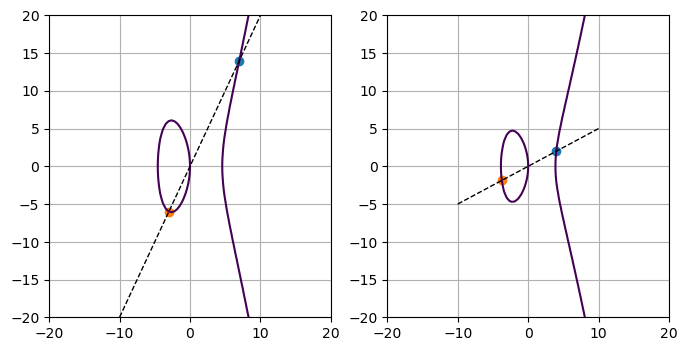

In [23]:
#https://volya.xyz/ecc/
#https://stackoverflow.com/questions/31074172/elliptic-curve-point-addition-over-a-finite-field-in-python
#https://github.com/fangpenlin/elliptic-curve-explained/blob/master/elliptic-curve.ipynb
subplot_size=4
subplot_cols=2
subplot_rows=1

fig, ax = plt.subplots(subplot_rows, subplot_cols, figsize=(subplot_size*subplot_cols,subplot_size*subplot_rows), dpi=100)
ax = ax.flatten()

y, x = np.ogrid[-20:20:100j, -20:20:100j]
ax[0].contour(x.ravel(), y.ravel(), y**2 - ec_1(x), [0])
ax[0].grid()
P=[7,14]
Q=[-3,-6]
ax[0].scatter(*P)
ax[0].scatter(*Q)

t = np.arange(-10, 10, 1)
step=0.001
x_list = [x * step for x in range(int(-10/step), int(10/step))]

slope=(Q[1]-P[1])/(Q[0]-P[0])
y_list = [slope*i for i in x_list]
ax[0].plot(x_list, y_list, linestyle='--', c='black', linewidth=1)

ax[1].contour(x.ravel(), y.ravel(), y**2 - ec_2(x), [0])
ax[1].grid()
P=[4,2]
Q=[-15/4,-15/8]
ax[1].scatter(*P)
ax[1].scatter(*Q)
slope=(Q[1]-P[1])/(Q[0]-P[0])
y_list = [slope*i for i in x_list]
ax[1].plot(x_list, y_list, linestyle='--', c='black', linewidth=1)

#ax[2].contour(x.ravel(), y.ravel(), y**2 - ec_3(x), [0])
#ax[2].grid()

plt.show()


In [9]:
arr=[]
for a in range(1, 500, 1):
    for b in range(1, 500, 1):
        if math.gcd(a, b) == 1:
            for p in primes:
                nom = b*b*b-a*a
                denom = p*b
                q=nom//denom
                if q>p and nom == q*denom and sympy.isprime(q):
                    arr.append([p,q,a,b])

df = pd.DataFrame(arr, columns = ['p', 'q', 'a', 'b'])
#df2=df.groupby(['p', 'q'], axis=0, as_index=True).agg(list)
#df2['cnt'] = [len(c) for c in df2['a']]

df2=df
df2['pq'] = df2['p'] * df2['q']
df2.sort_values(by=['pq'], ascending=True, inplace=True)
df2.to_csv("grouped.csv", index=True)
df2.head(200)

,p,q,a,b,pq


In [38]:
for pair in itertools.combinations(primes, 2):
    p=pair[0]
    q=pair[1]
    res = []
    for a in range(-10,10):
        if a != 0:
            for b in range(1,10):
                if p*q == a*a+b*b*b*b:
                    res.append([p,q,a,b])
    if len(res) > 2:
        print(res)


[[5, 13, -8, 1], [5, 13, -7, 2], [5, 13, 7, 2], [5, 13, 8, 1]]


In [80]:
for a in range(1,1000):
    for b in range(1,1000):
        if a*a+b*b == 4241:
            print("{0} {1}".format(a,b))

4 65
65 4
